In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

## Ventura County

You can find the Ventura County GIS Data Service at https://venturacountydatadownloads-vcitsgis.hub.arcgis.com/ .

You can find wildlife sightings records at https://www.inaturalist.org/ .

Here are some resources I stored in my github, so that you could get started with mapmaking in Ventura County.



In [2]:
mask = gpd.read_file('https://github.com/cbrown-clu/class_data/raw/refs/heads/main/data/Ventura%20county%20data/Ventura_County_-_Mask.geojson').to_crs(epsg=26910)
mask.head()

objectid                county  county_typ  county_no     perimeter  \
0         1         Pacific Ocean           0          0  1.047312e+06   
1         2  Santa Barbara County           2          4  5.551119e+05   
2         3        Ventura County           1          1  1.000961e+06   
3         4          Kern County            2          3  8.189441e+05   
4         5    Los Angeles County           2          2  1.031042e+06   

          acres created_user created_date last_edited_user last_edited_date  \
0  7.379422e+05         None         None             None             None   
1  3.362779e+05         None         None             None             None   
2  1.172745e+06         None         None             None             None   
3  5.053456e+05         None         None             None             None   
4  7.359354e+05         None         None             None             None   

                                 globalid  shape_Length  shape_Area  \
0  {C0F8979C-5E70-4B95-9DC1-E2D5BDE5AA39}      3.273631    0.293154   
1  {4D53EDD1-E7FB-4751-9FCE-6E92E1BCA129}      1.621735    0.133839   
2  {CB6E0099-0135-4FC3-9D7E-E92C6D7ED564}      3.000956    0.465742   
3  {ACF49F10-E6C3-4549-9E23-21C00E9C405C}      2.636023    0.201451   
4  {A108922E-06D4-4C51-B2ED-6711046B0CBA}      3.065246    0.292098   

                                            geometry  
0  MULTIPOLYGON (((809314.259 3813451.432, 809406...  
1  MULTIPOLYGON (((824893.108 3867856.341, 824946...  
2  MULTIPOLYGON (((824893.108 3867856.341, 825709...  
3  MULTIPOLYGON (((820247.283 3879834.003, 850203...  
4  MULTIPOLYGON (((876207.32 3859103.597, 875556....

In [3]:
mask = mask[mask['county'] == 'Ventura County']

<Axes: >

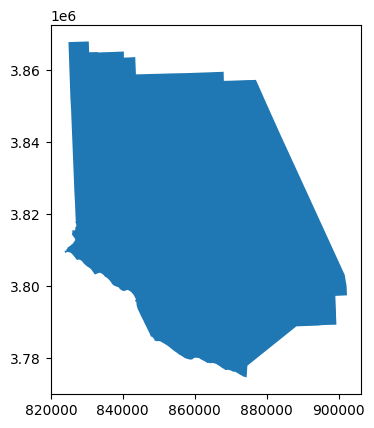

In [4]:
mask.plot()

In [5]:
mask.area

2    4.757974e+09
dtype: float64

In [6]:
rivers_streams = (
    gpd.read_file('https://github.com/cbrown-clu/class_data/raw/refs/heads/main/data/Ventura%20county%20data/RiverStreams.geojson')
    .to_crs(epsg=26910)
    .clip(mask)
)

<Axes: >

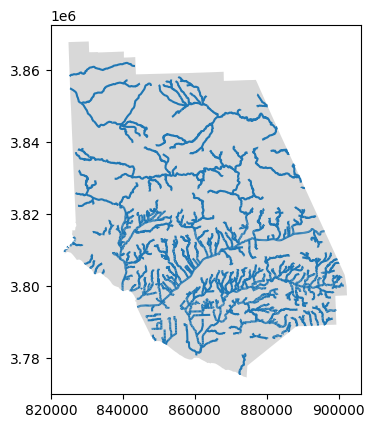

In [7]:
ax = mask.plot(alpha=0.3,color='gray')
rivers_streams.plot(ax=ax)

In [8]:
greenbelts = (
    gpd.read_file('https://github.com/cbrown-clu/class_data/raw/refs/heads/main/data/Ventura%20county%20data/Greenbelts.geojson')
    .to_crs(epsg=26910)
    .clip(mask)
)

<Axes: >

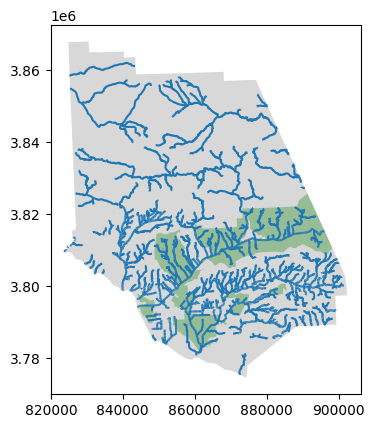

In [9]:
ax = mask.plot(alpha=0.3,color='gray')
rivers_streams.plot(ax=ax)
greenbelts.plot(ax=ax,color='green',alpha=0.3)

In [10]:
bobcats = pd.read_csv('https://github.com/cbrown-clu/class_data/raw/refs/heads/main/data/Ventura%20county%20data/inaturalist%20bobcats%20ventura%20county.csv')

In [11]:
bobcats.head()

id   latitude   longitude scientific_name common_name
0   33472  34.289878 -118.821688      Lynx rufus      Bobcat
1  123818  34.117729 -119.078895      Lynx rufus      Bobcat
2  338504  34.688036 -119.358856      Lynx rufus      Bobcat
3  584954  34.156667 -118.963167      Lynx rufus      Bobcat
4  585550  34.023262 -118.956575      Lynx rufus      Bobcat

In [14]:
bobcats['geometry'] = bobcats.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)
bobcats = (
    gpd.GeoDataFrame(bobcats, geometry='geometry',crs='epsg:4326')
    .to_crs(epsg=26910)
    .clip(mask)
)
bobcats.head()

id   latitude   longitude scientific_name common_name  \
267  144859912  34.070166 -118.959000      Lynx rufus      Bobcat   
7      1097005  34.073511 -119.009067      Lynx rufus      Bobcat   
102   34450293  34.074047 -119.015774      Lynx rufus      Bobcat   
232  106869443  34.076472 -119.014733      Lynx rufus      Bobcat   
199   95781341  34.132589 -118.907680      Lynx rufus      Bobcat   

                           geometry  
267   POINT (872986.41 3777311.691)  
7     POINT (868347.908 3777501.06)  
102  POINT (867726.138 3777536.371)  
232   POINT (867811.783 3777809.25)  
199  POINT (877448.369 3784428.541)

<Axes: >

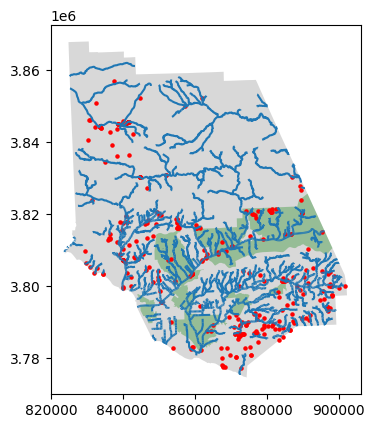

In [15]:
ax = mask.plot(alpha=0.3,color='gray')
rivers_streams.plot(ax=ax)
greenbelts.plot(ax=ax,color='green',alpha=0.3)
bobcats.plot(ax=ax,marker='o',color='red',markersize=5)

In [16]:
rivers_streams['buffer'] = rivers_streams.buffer(200)
bobcats_near_water = bobcats[bobcats.within(rivers_streams['buffer'].union_all())]

<Axes: >

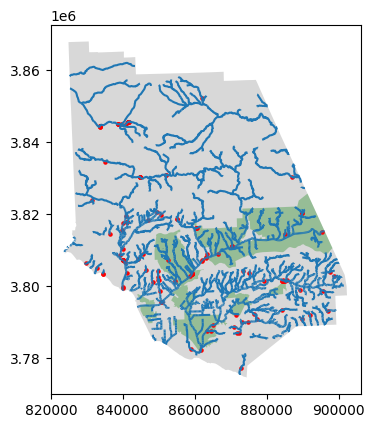

In [17]:
ax = mask.plot(alpha=0.3,color='gray')
rivers_streams.plot(ax=ax)
greenbelts.plot(ax=ax,color='green',alpha=0.3)
bobcats_near_water.plot(ax=ax,marker='o',color='red',markersize=5)

In [18]:
bobcats_near_water.shape

(146, 6)

In [ ]:
bobcats.shape

(329, 6)

In [19]:
bobcats_in_greenbelts = bobcats[bobcats.within(greenbelts.geometry.union_all())]

<Axes: >

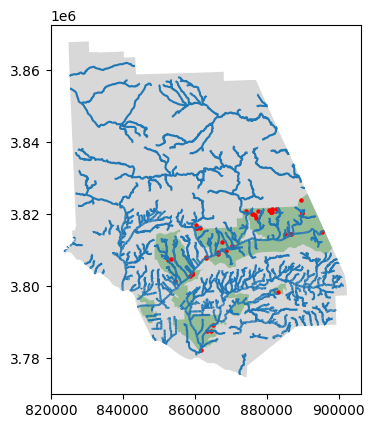

In [20]:
ax = mask.plot(alpha=0.3,color='gray')
rivers_streams.plot(ax=ax)
greenbelts.plot(ax=ax,color='green',alpha=0.3)
bobcats_in_greenbelts.plot(ax=ax,marker='o',color='red',markersize=5)